In [5]:
!pip install mediapipe

In [6]:
!wget -O pose_landmarker_heavy.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [19]:
import mediapipe as mp
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

import numpy as np

import cv2
from google.colab.patches import cv2_imshow

In [10]:
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())

  return annotated_image

In [40]:
base_options = python.BaseOptions(model_asset_path='/content/pose_landmarker_heavy.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)

detector = vision.PoseLandmarker.create_from_options(options)

In [48]:
east = mp.Image.create_from_file("/content/000003E.jpg")
west = mp.Image.create_from_file("/content/000003W.jpg")
north = mp.Image.create_from_file("/content/000003N.jpg")
south = mp.Image.create_from_file("/content/000003S.jpg")

image1 = mp.Image.create_from_file("/content/image.jpg")
image2 = mp.Image.create_from_file("/content/image-ups.jpg")
image3 = mp.Image.create_from_file("/content/image-ups-lighten.jpg")

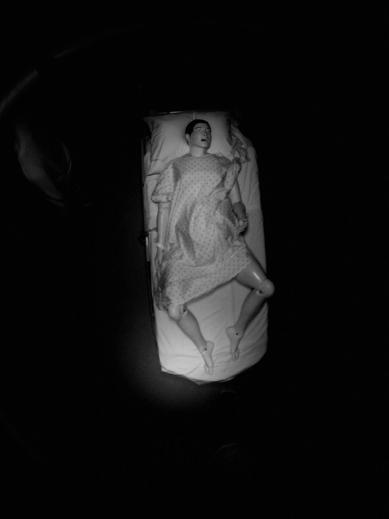

In [51]:


# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image3)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [43]:
results = []

for image in [east, west, north, south]:
  results.append(detector.detect(image))

In [44]:
results

[PoseLandmarkerResult(pose_landmarks=[], pose_world_landmarks=[], segmentation_masks=None),
 PoseLandmarkerResult(pose_landmarks=[], pose_world_landmarks=[], segmentation_masks=None),
 PoseLandmarkerResult(pose_landmarks=[], pose_world_landmarks=[], segmentation_masks=None),
 PoseLandmarkerResult(pose_landmarks=[], pose_world_landmarks=[], segmentation_masks=None)]

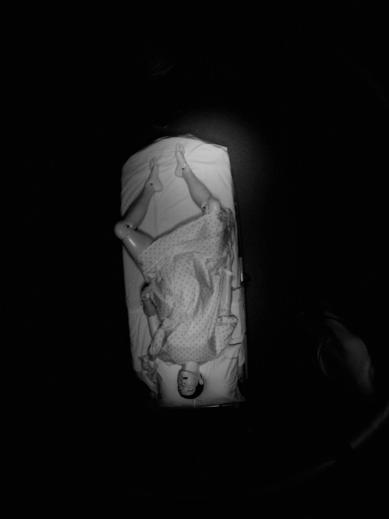

TypeError: 'NoneType' object is not subscriptable

In [45]:
for result in results:
  annotated_image = draw_landmarks_on_image(image.numpy_view(), result)
  cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

  segmentation_mask = result.segmentation_masks[0].numpy_view()
  visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
  cv2_imshow(visualized_mask)